In [1]:
import pandas as pd
import re
from collections import Counter
from textblob import TextBlob

In [2]:
#pip install textblob

In [3]:
df = pd.read_csv('processed_tweets.csv').reset_index(drop=True)


In [5]:
df

,ids,tweet_id,date,flag,user,tweet,sentiment
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,0.000
1,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save rest go bounds,0.500
2,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.200
3,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving im mad cant see,-0.625
4,5,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,whole crew,0.200
...,...,...,...,...,...,...,...
1598309,1598310,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,woke school best feeling ever,1.000
1598310,1598311,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,thewdbcom cool hear old walt interviews,0.225
1598311,1598312,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,ready mojo makeover ask details,0.200
1598312,1598313,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru sh...,0.800


We can see that index and ids are out of sequence...

In [6]:
# Assuming df is your DataFrame
# Drop rows where 'tweet' is NaN
df = df.dropna(subset=['tweet'])

# Now, df no longer contains any rows with NaN in the 'tweet' column


In [7]:
df

,ids,tweet_id,date,flag,user,tweet,sentiment
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,0.000
1,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save rest go bounds,0.500
2,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.200
3,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving im mad cant see,-0.625
4,5,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,whole crew,0.200
...,...,...,...,...,...,...,...
1598309,1598310,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,woke school best feeling ever,1.000
1598310,1598311,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,thewdbcom cool hear old walt interviews,0.225
1598311,1598312,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,ready mojo makeover ask details,0.200
1598312,1598313,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru sh...,0.800


In [8]:
# Reset the index and drop the old one
df = df.reset_index(drop=True)

In [9]:
df

,ids,tweet_id,date,flag,user,tweet,sentiment
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,0.000
1,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save rest go bounds,0.500
2,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.200
3,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving im mad cant see,-0.625
4,5,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,whole crew,0.200
...,...,...,...,...,...,...,...
1590338,1598310,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,woke school best feeling ever,1.000
1590339,1598311,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,thewdbcom cool hear old walt interviews,0.225
1590340,1598312,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,ready mojo makeover ask details,0.200
1590341,1598313,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru sh...,0.800


In [10]:
# Resetting the 'ids' column to have a sequential count starting from 1
df['ids'] = range(1, len(df) + 1)

In [11]:
df

,ids,tweet_id,date,flag,user,tweet,sentiment
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...,0.000
1,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save rest go bounds,0.500
2,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.200
3,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving im mad cant see,-0.625
4,5,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,whole crew,0.200
...,...,...,...,...,...,...,...
1590338,1590339,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,woke school best feeling ever,1.000
1590339,1590340,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,thewdbcom cool hear old walt interviews,0.225
1590340,1590341,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,ready mojo makeover ask details,0.200
1590341,1590342,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru sh...,0.800


In [12]:
df = df.drop('sentiment', axis=1)

In [14]:
df.head(1)

,ids,tweet_id,date,flag,user,tweet
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry r...


Now index and ids are in sequence.

In [26]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from tqdm.auto import tqdm

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define the function to get VADER sentiment scores
def get_vader_score(tweet):
    score = sia.polarity_scores(tweet)
    return score['compound']  # Returns the compound score which is a combined sentiment score

# Importing tqdm module to track progress
from tqdm.auto import tqdm
tqdm.pandas(desc="Analyzing Sentiments")


# Apply the sentiment analysis function with progress tracking
df['vader_score'] = df['tweet'].progress_apply(get_vader_score)

# Save the results to a CSV file
df.to_csv('tweets_with_vader_scores.csv', index=False)

# Print the first few entries to verify
print(df.head())



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jose\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Analyzing Sentiments:   0%|          | 0/1590343 [00:00<?, ?it/s]

   ids    tweet_id                 date      flag           user  \
0    1  1467810672  2009-04-06 22:19:49  NO_QUERY  scotthamilton   
1    2  1467810917  2009-04-06 22:19:53  NO_QUERY       mattycus   
2    3  1467811184  2009-04-06 22:19:57  NO_QUERY        ElleCTF   
3    4  1467811193  2009-04-06 22:19:57  NO_QUERY         Karoli   
4    5  1467811372  2009-04-06 22:20:00  NO_QUERY       joy_wolf   

                                               tweet  vader_score  
0  upset cant update facebook texting might cry r...      -0.7269  
1  dived many times ball managed save rest go bounds       0.4939  
2                   whole body feels itchy like fire      -0.2500  
3                           behaving im mad cant see      -0.4939  
4                                         whole crew       0.0000  


In [27]:
df['date'] = pd.to_datetime(df['date'])
# Strip time part to just keep the date
df['day'] = df['date'].dt.date

In [35]:
# Group by the date and count tweets
sentiment_average = df.groupby('day')['vader_score'].mean()


In [36]:
sentiment_average

day
2009-04-06    0.149710
2009-04-07    0.168952
2009-04-17    0.204442
2009-04-18    0.183523
2009-04-19    0.189118
2009-04-20    0.181151
2009-04-21    0.181557
2009-05-01    0.180541
2009-05-02    0.183295
2009-05-03    0.175477
2009-05-04    0.170850
2009-05-09    0.185756
2009-05-10    0.214157
2009-05-11    0.166859
2009-05-13    0.147983
2009-05-14    0.174673
2009-05-16    0.174701
2009-05-17    0.202786
2009-05-18    0.190769
2009-05-21    0.177463
2009-05-22    0.200422
2009-05-23    0.206487
2009-05-25    0.190222
2009-05-26    0.175078
2009-05-27    0.136196
2009-05-28    0.187763
2009-05-29    0.186463
2009-05-30    0.193465
2009-05-31    0.194989
2009-06-01    0.176648
2009-06-02    0.178337
2009-06-03    0.175142
2009-06-04    0.161818
2009-06-05    0.186798
2009-06-06    0.184296
2009-06-07    0.184579
2009-06-14    0.174186
2009-06-15    0.170982
2009-06-16    0.095041
2009-06-17   -0.014981
2009-06-18   -0.018223
2009-06-19   -0.013317
2009-06-20   -0.007726
2009-06

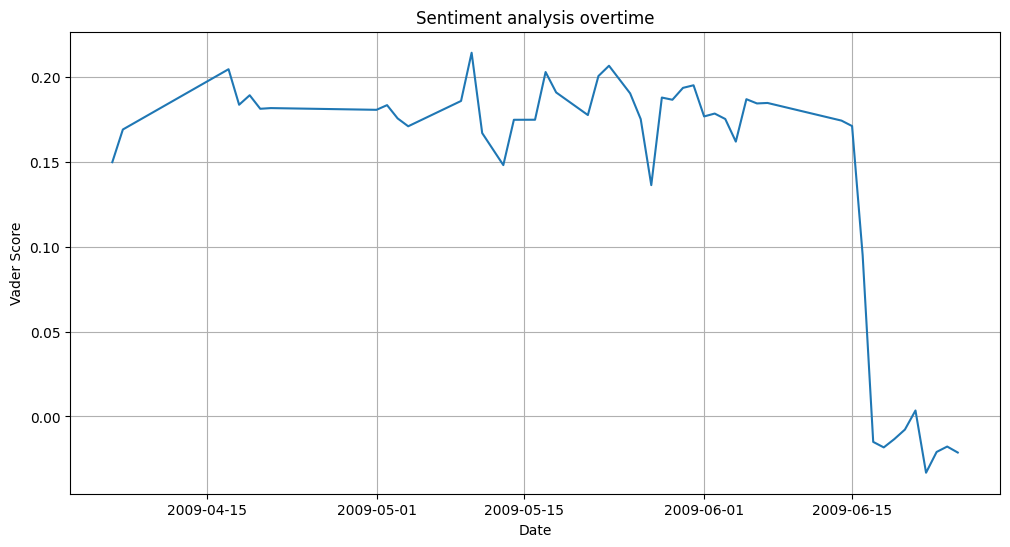

In [33]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sentiment_average.index, sentiment_average.values)
plt.title('Sentiment analysis overtime')
plt.xlabel('Date')
plt.ylabel('Vader Score')
plt.grid(True)
plt.show()

In [34]:
# Saving df
df.to_csv('C:/Users/jose/Downloads/ProjectTweetsVAder.csv', index=False, header=True, encoding='utf-8', sep=',')


In [49]:
df

,ids,tweet_id,date,flag,user,tweet
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,5,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1598309,1598310,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1598310,1598311,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1598311,1598312,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1598312,1598313,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


## Total timeframe (time difference)

In [50]:
# Calculatint the time difference
time_difference = df['date'].iloc[-1] - df['date'].iloc[0]

# Print the result
print('First tweet send out the 2009-04-06 22:19:49 and last one  2009-06-16 08:40:50')

# Print the result
print('Total time difference:',time_difference)

First tweet send out the 2009-04-06 22:19:49 and last one  2009-06-16 08:40:50
Total time difference: 70 days 10:21:01


In [51]:
# Creating a df backup
df1 = df.copy()

In [52]:
dfc = df1.copy()

## Plotting the number of tweets per day

In [53]:
# Strip time part to just keep the date
df['day'] = df['date'].dt.date


In [54]:
df.head()

,ids,tweet_id,date,flag,user,tweet,day
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,2009-04-06
1,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,2009-04-06
2,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06
3,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",2009-04-06
4,5,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,2009-04-06


In [55]:
# Group by the date and count tweets
tweet_counts = df.groupby('day').size()


In [56]:
tweet_counts

day
2009-04-06      3353
2009-04-07     17289
2009-04-17      3083
2009-04-18     21732
2009-04-19     27433
2009-04-20     18433
2009-04-21      8579
2009-05-01      7708
2009-05-02     27402
2009-05-03     35288
2009-05-04     15457
2009-05-09     11732
2009-05-10     25984
2009-05-11      4184
2009-05-13      4063
2009-05-14     17431
2009-05-16      9135
2009-05-17     40106
2009-05-18     36415
2009-05-21      2128
2009-05-22     39018
2009-05-23       169
2009-05-25       169
2009-05-26     10770
2009-05-27       839
2009-05-28     15885
2009-05-29     73755
2009-05-30    103554
2009-05-31     94432
2009-06-01    110148
2009-06-02     64115
2009-06-03     41532
2009-06-04      7835
2009-06-05     58705
2009-06-06    111513
2009-06-07     96233
2009-06-14      8261
2009-06-15    109654
2009-06-16     67912
2009-06-17     44012
2009-06-18     43004
2009-06-19     43136
2009-06-20     45364
2009-06-21     16360
2009-06-22     12009
2009-06-23     17002
2009-06-24      6299
2009-06-2

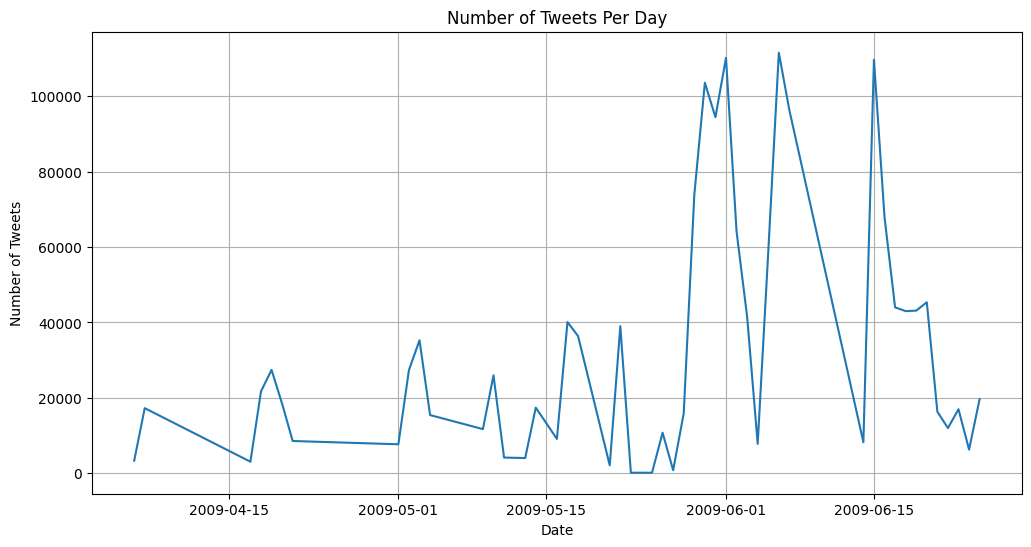

In [57]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(tweet_counts.index, tweet_counts.values)
plt.title('Number of Tweets Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


In [58]:
tweet_counts

day
2009-04-06      3353
2009-04-07     17289
2009-04-17      3083
2009-04-18     21732
2009-04-19     27433
2009-04-20     18433
2009-04-21      8579
2009-05-01      7708
2009-05-02     27402
2009-05-03     35288
2009-05-04     15457
2009-05-09     11732
2009-05-10     25984
2009-05-11      4184
2009-05-13      4063
2009-05-14     17431
2009-05-16      9135
2009-05-17     40106
2009-05-18     36415
2009-05-21      2128
2009-05-22     39018
2009-05-23       169
2009-05-25       169
2009-05-26     10770
2009-05-27       839
2009-05-28     15885
2009-05-29     73755
2009-05-30    103554
2009-05-31     94432
2009-06-01    110148
2009-06-02     64115
2009-06-03     41532
2009-06-04      7835
2009-06-05     58705
2009-06-06    111513
2009-06-07     96233
2009-06-14      8261
2009-06-15    109654
2009-06-16     67912
2009-06-17     44012
2009-06-18     43004
2009-06-19     43136
2009-06-20     45364
2009-06-21     16360
2009-06-22     12009
2009-06-23     17002
2009-06-24      6299
2009-06-2

In [59]:
df = pd.read_csv('C:/Users/jose/Downloads/ProjectTweets1.csv').reset_index(drop=True)

In [60]:
pd.set_option('display.max_colwidth', None)

df['tweet'].head(20)

0           is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
1                                 @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
2                                                                           my whole body feels itchy and like its on fire 
3           @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
4                                                                                             @Kwesidei not the whole crew 
5                                                                                                               Need a hug 
6                       @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?
7                                                                                      @Tatiana_K nope they didn't have it 
8       

In [61]:
import pandas as pd
from tqdm.auto import tqdm
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Enhanced cleaning function
def clean_tweet(tweet):
    # Remove URLs, mentions, and hashtags
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r'#\S+', '', tweet)

    # Remove all non-letters and non-essential spaces
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)

    # Convert to lower case
    tweet = tweet.lower().strip()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tweet = ' '.join(word for word in tweet.split() if word not in stop_words)

    # Optional: Remove emojis - can be extended to include specific emoji patterns
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)
    
    return tweet

# Apply cleaning function to the tweets with progress indicator
tqdm.pandas()
df['tweet'] = df['tweet'].progress_apply(clean_tweet)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/1598314 [00:00<?, ?it/s]

In [62]:
pd.set_option('display.max_colwidth', None)

df['tweet'].head(20)

0     upset cant update facebook texting might cry result school today also blah
1                              dived many times ball managed save rest go bounds
2                                               whole body feels itchy like fire
3                                                       behaving im mad cant see
4                                                                     whole crew
5                                                                       need hug
6                    hey long time see yes rains bit bit lol im fine thanks hows
7                                                                     nope didnt
8                                                                      que muera
9                                                spring break plain city snowing
10                                                                repierced ears
11                               couldnt bear watch thought ua loss embarrassing
12                          

In [63]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity  # Return only the polarity

# Apply sentiment analysis to compute polarity
df['sentiment'] = df['tweet'].progress_apply(get_sentiment)

# Save the DataFrame
df.to_csv('processed_tweets.csv', index=False)

# Check the first few entries
print(df[['date', 'tweet', 'sentiment']].head())


  0%|          | 0/1598314 [00:00<?, ?it/s]

                  date  \
0  2009-04-06 22:19:49   
1  2009-04-06 22:19:53   
2  2009-04-06 22:19:57   
3  2009-04-06 22:19:57   
4  2009-04-06 22:20:00   

                                                                        tweet  \
0  upset cant update facebook texting might cry result school today also blah   
1                           dived many times ball managed save rest go bounds   
2                                            whole body feels itchy like fire   
3                                                    behaving im mad cant see   
4                                                                  whole crew   

   sentiment  
0      0.000  
1      0.500  
2      0.200  
3     -0.625  
4      0.200  


In [69]:
df = pd.read_csv('processed_tweets.csv').reset_index(drop=True)

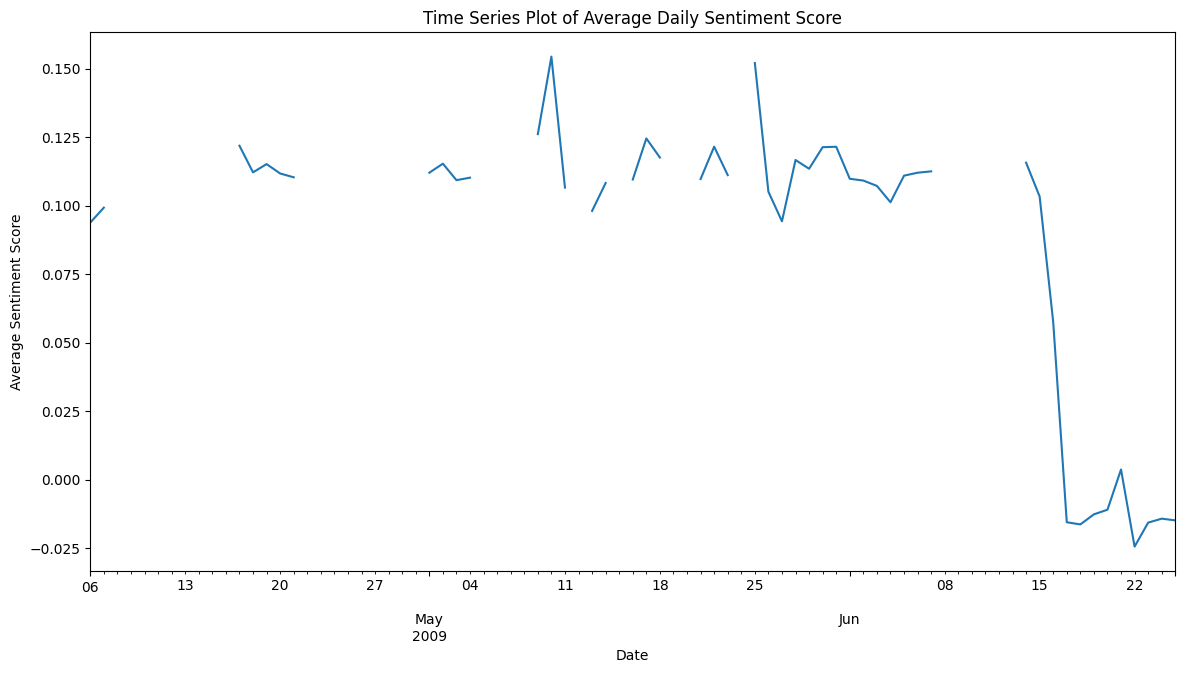

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('processed_tweets.csv')

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the date column as the index
df.set_index('date', inplace=True)

# Resample and average the sentiment scores by day
daily_sentiment = df['sentiment'].resample('D').mean()  # 'D' stands for daily

# Plotting the daily average sentiment
plt.figure(figsize=(14, 7))
daily_sentiment.plot(title='Daily Average Sentiment Over Time')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Time Series Plot of Average Daily Sentiment Score')

# Show the plot
plt.show()


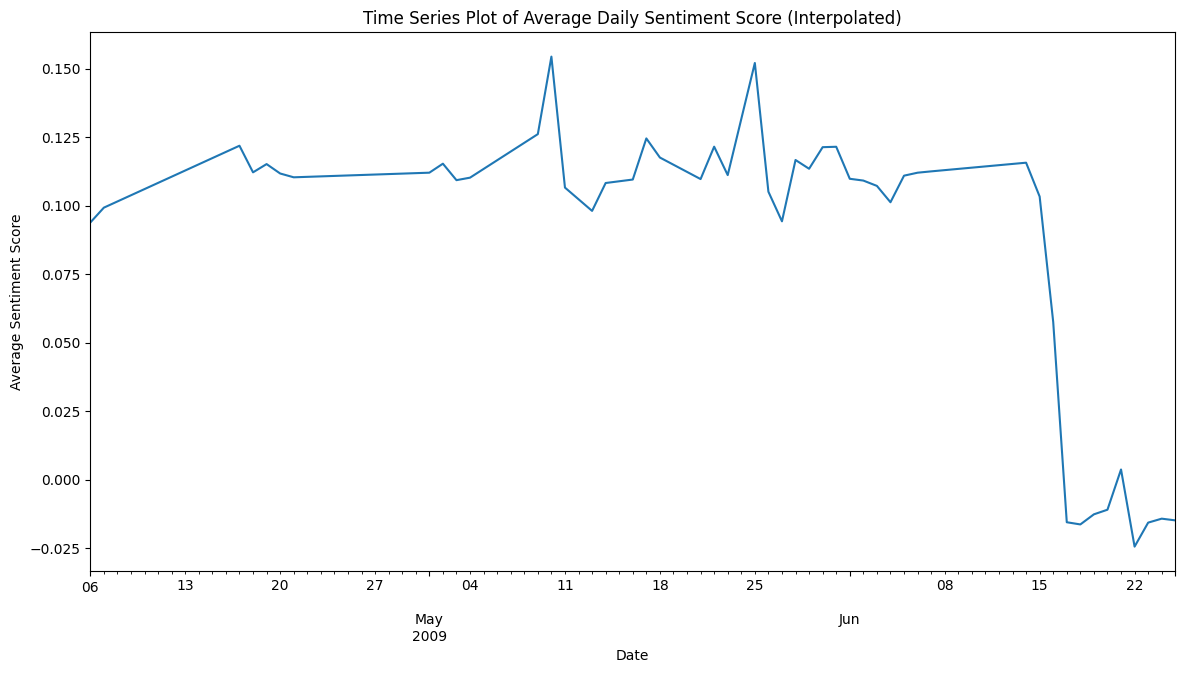

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('processed_tweets.csv')

# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the date column as the index
df.set_index('date', inplace=True)

# Resample and average the sentiment scores by day
daily_sentiment = df['sentiment'].resample('D').mean()  # 'D' stands for daily

# Interpolate missing values
daily_sentiment_interpolated = daily_sentiment.interpolate()

# Plotting the daily average sentiment with interpolated values
plt.figure(figsize=(14, 7))
daily_sentiment_interpolated.plot(title='Daily Average Sentiment Over Time with Interpolated Values')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Time Series Plot of Average Daily Sentiment Score (Interpolated)')

# Show the plot
plt.show()


In [72]:
df['date'] = pd.to_datetime(df['date'])
# Strip time part to just keep the date
df['day'] = df['date'].dt.date


In [71]:
df

,ids,tweet_id,date,flag,user,tweet,sentiment
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry result school today also blah,0.000
1,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save rest go bounds,0.500
2,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.200
3,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving im mad cant see,-0.625
4,5,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,whole crew,0.200
...,...,...,...,...,...,...,...
1598309,1598310,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,woke school best feeling ever,1.000
1598310,1598311,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,thewdbcom cool hear old walt interviews,0.225
1598311,1598312,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,ready mojo makeover ask details,0.200
1598312,1598313,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru shakur,0.800


In [76]:
# Group by the date and count tweets
sentiment_average = df.groupby('day')['sentiment'].mean()


In [77]:
sentiment_average

day
2009-04-06    0.093840
2009-04-07    0.099284
2009-04-17    0.121895
2009-04-18    0.112179
2009-04-19    0.115193
2009-04-20    0.111759
2009-04-21    0.110367
2009-05-01    0.112054
2009-05-02    0.115338
2009-05-03    0.109324
2009-05-04    0.110236
2009-05-09    0.126133
2009-05-10    0.154428
2009-05-11    0.106612
2009-05-13    0.098100
2009-05-14    0.108282
2009-05-16    0.109553
2009-05-17    0.124565
2009-05-18    0.117586
2009-05-21    0.109719
2009-05-22    0.121552
2009-05-23    0.111175
2009-05-25    0.152112
2009-05-26    0.105112
2009-05-27    0.094297
2009-05-28    0.116688
2009-05-29    0.113488
2009-05-30    0.121365
2009-05-31    0.121518
2009-06-01    0.109829
2009-06-02    0.109176
2009-06-03    0.107229
2009-06-04    0.101262
2009-06-05    0.110964
2009-06-06    0.112050
2009-06-07    0.112534
2009-06-14    0.115700
2009-06-15    0.103333
2009-06-16    0.057526
2009-06-17   -0.015569
2009-06-18   -0.016369
2009-06-19   -0.012681
2009-06-20   -0.010995
2009-06

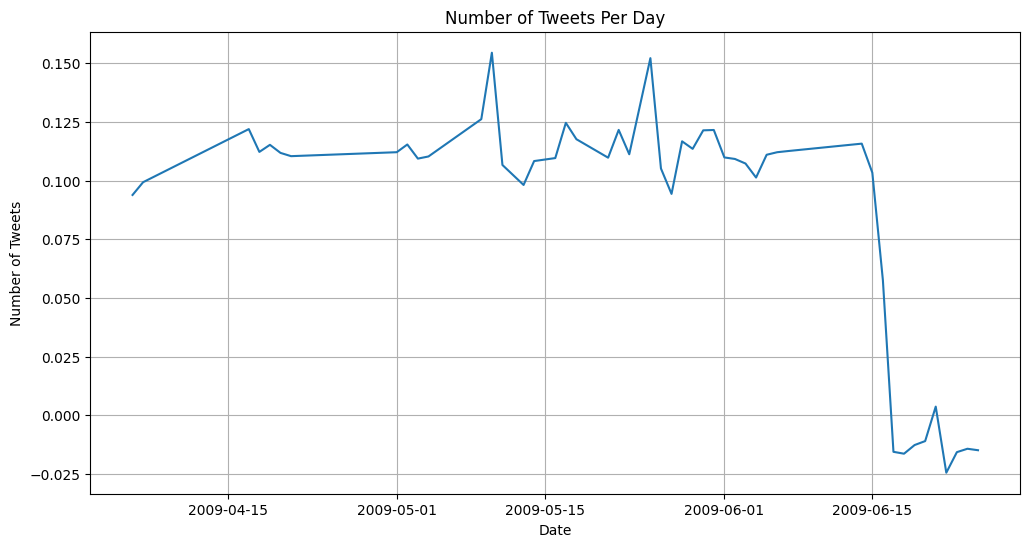

In [82]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sentiment_average.index, sentiment_average.values)
plt.title('Number of Tweets Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

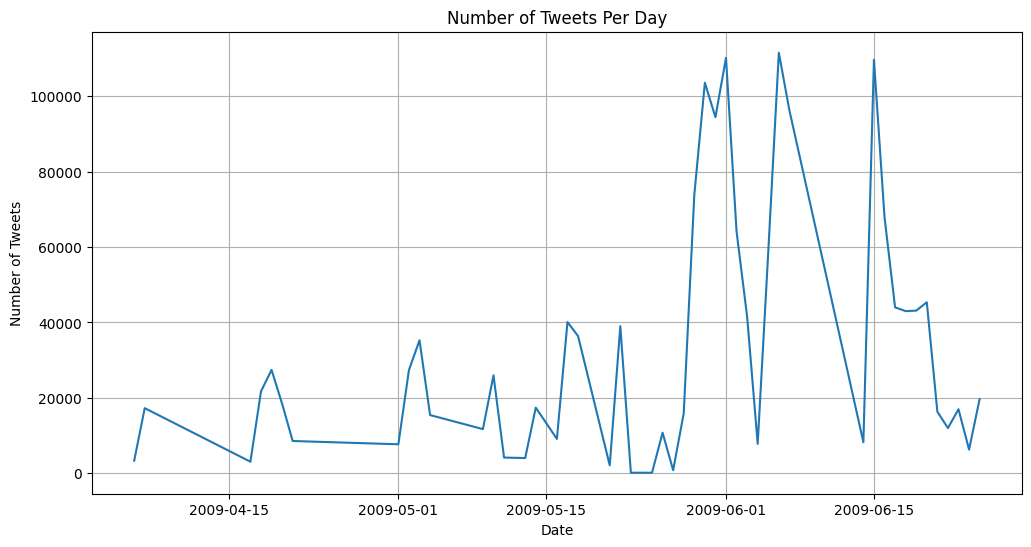

In [83]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(tweet_counts.index, tweet_counts.values)
plt.title('Number of Tweets Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


In [85]:
import nltk
from nltk.corpus import stopwords

# Download the list of stopwords if not previously done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def extract_and_count_features(tweets):
 
    words = []

    for tweet in tweets:
        words.extend(re.findall(r'\b\w+\b', tweet.lower()))  # convert to lower case before regex

    # Filter out stop words from the words list
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]

    # Count the occurrences and sort by frequency in descending order

    word_counts = Counter(filtered_words)

 
    sorted_words = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)

    sorted_words

# Assuming df is your DataFrame and 'tweet' is the column with the tweet text
top_words = extract_and_count_features(df['tweet'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jose\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


AttributeError: 'float' object has no attribute 'lower'

In [86]:
df

,ids,tweet_id,date,flag,user,tweet,sentiment,day
0,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,upset cant update facebook texting might cry result school today also blah,0.000,2009-04-06
1,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,dived many times ball managed save rest go bounds,0.500,2009-04-06
2,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,whole body feels itchy like fire,0.200,2009-04-06
3,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,behaving im mad cant see,-0.625,2009-04-06
4,5,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,whole crew,0.200,2009-04-06
...,...,...,...,...,...,...,...,...
1598309,1598310,2193601966,2009-06-16 08:40:49,NO_QUERY,AmandaMarie1028,woke school best feeling ever,1.000,2009-06-16
1598310,1598311,2193601969,2009-06-16 08:40:49,NO_QUERY,TheWDBoards,thewdbcom cool hear old walt interviews,0.225,2009-06-16
1598311,1598312,2193601991,2009-06-16 08:40:49,NO_QUERY,bpbabe,ready mojo makeover ask details,0.200,2009-06-16
1598312,1598313,2193602064,2009-06-16 08:40:49,NO_QUERY,tinydiamondz,happy th birthday boo alll time tupac amaru shakur,0.800,2009-06-16


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598314 entries, 0 to 1598313
Data columns (total 8 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   ids        1598314 non-null  int64         
 1   tweet_id   1598314 non-null  int64         
 2   date       1598314 non-null  datetime64[ns]
 3   flag       1598314 non-null  object        
 4   user       1598314 non-null  object        
 5   tweet      1590343 non-null  object        
 6   sentiment  1598314 non-null  float64       
 7   day        1598314 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 97.6+ MB


In [88]:


# Creating a new DataFrame that only includes rows where 'tweet' is NaN
nan_tweets_df = df[pd.isna(df['tweet'])]

# Now, nan_tweets_df contains all rows from df where the tweet is NaN
nan_tweets_df

,ids,tweet_id,date,flag,user,tweet,sentiment,day
82,83,1467834265,2009-04-06 22:25:54,NO_QUERY,mike_webster_au,NaN,0.0,2009-04-06
207,208,1467863072,2009-04-06 22:33:25,NO_QUERY,Artiel87,NaN,0.0,2009-04-06
248,249,1467874569,2009-04-06 22:36:27,NO_QUERY,Artiel87,NaN,0.0,2009-04-06
281,282,1467881474,2009-04-06 22:38:20,NO_QUERY,__Susan__,NaN,0.0,2009-04-06
397,398,1467912842,2009-04-06 22:46:53,NO_QUERY,KimberlyKane,NaN,0.0,2009-04-06
...,...,...,...,...,...,...,...,...
1597239,1597240,2193305981,2009-06-16 08:16:39,NO_QUERY,Jsstar0273,NaN,0.0,2009-06-16
1597809,1597810,2193453573,2009-06-16 08:28:48,NO_QUERY,RobNice24,NaN,0.0,2009-06-16
1597867,1597868,2193475408,2009-06-16 08:30:32,NO_QUERY,SamNiley11,NaN,0.0,2009-06-16
1598126,1598127,2193550913,2009-06-16 08:36:39,NO_QUERY,handriani,NaN,0.0,2009-06-16


In [89]:
import pandas as pd

# Assuming df is your DataFrame
# Drop rows where 'tweet' is NaN
df = df.dropna(subset=['tweet'])

# Now, df no longer contains any rows with NaN in the 'tweet' column


In [91]:
# Group by the date and count tweets
sentiment_average = df.groupby('day')['sentiment'].mean()


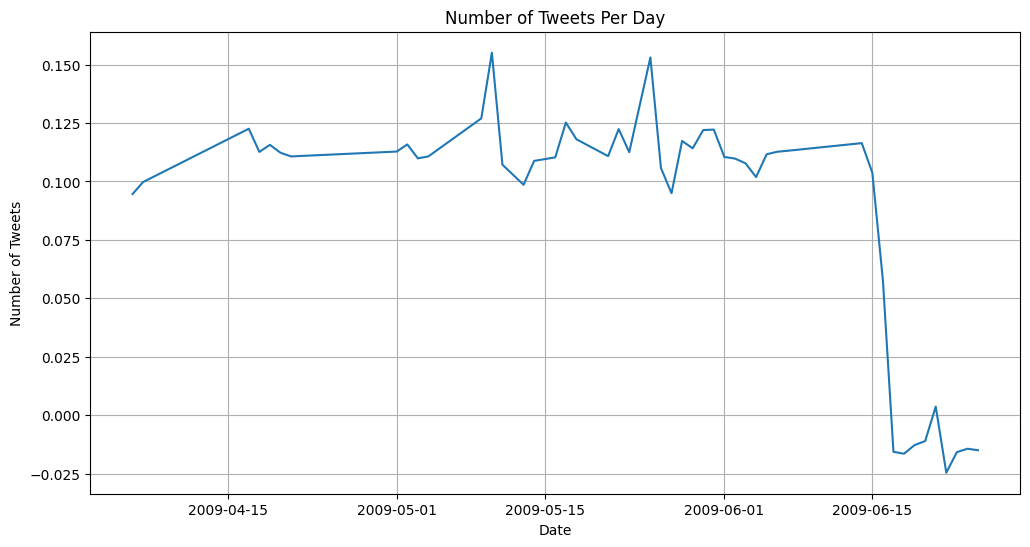

In [92]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sentiment_average.index, sentiment_average.values)
plt.title('Number of Tweets Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()

In [93]:
# Group by the date and count tweets
tweet_counts = df.groupby('day').size()


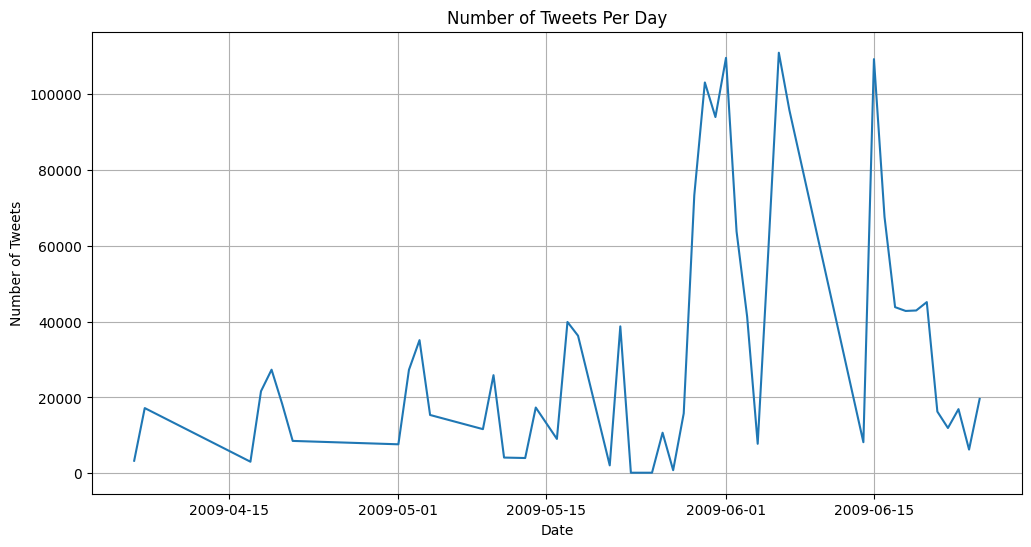

In [94]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(tweet_counts.index, tweet_counts.values)
plt.title('Number of Tweets Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()